## ASTEROID NEAR EARTH
Predicting data using Logistic Regression 

In [97]:
# importing the libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.impute import SimpleImputer

In [98]:
# loading the dataset
# Low Memory -> This implies that read_csv loads the file in sections when the file is larger in size. Read csv will save a section as numeric if it contains only numeric values throughout. 
# It will save the values in a chunk as non-numeric if it comes across some non-numeric values in that section (object).

asteroid = pd.read_csv('/Users/raw/Desktop/project_/dataset.csv', low_memory= False)

#  Quick description of data

In [99]:
asteroid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [100]:
print(f'values------> 900k\ncolumns------> 45\n\t numeric col------> 36\n\t categorical col------> 10')

values------> 900k
columns------> 45
	 numeric col------> 36
	 categorical col------> 10


In [101]:
# taking a quick look on the Data Structure
asteroid.head() #looking at the top five rows


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [102]:
# statistical summary of each numerical attribute
asteroid.describe() 

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [103]:
# checking our target variable 
asteroid['neo'].value_counts()

N    935625
Y     22895
Name: neo, dtype: int64

In [104]:
asteroid['neo'].unique()

array(['N', 'Y', nan], dtype=object)

In [105]:
asteroid['neo'].isnull().sum()

4

In [106]:
# null values in target variable 
# asteroid['neo'] = asteroid['neo'].isnull().dropna(axis=0)
asteroid = asteroid.dropna(subset=['neo'])

In [107]:
asteroid['neo'].unique()


array(['N', 'Y'], dtype=object)

In [108]:
#Checking for Null Values in the entire dataset.
asteroid['neo'].isnull().sum()

0

#Visualization of Asteroid Dataset

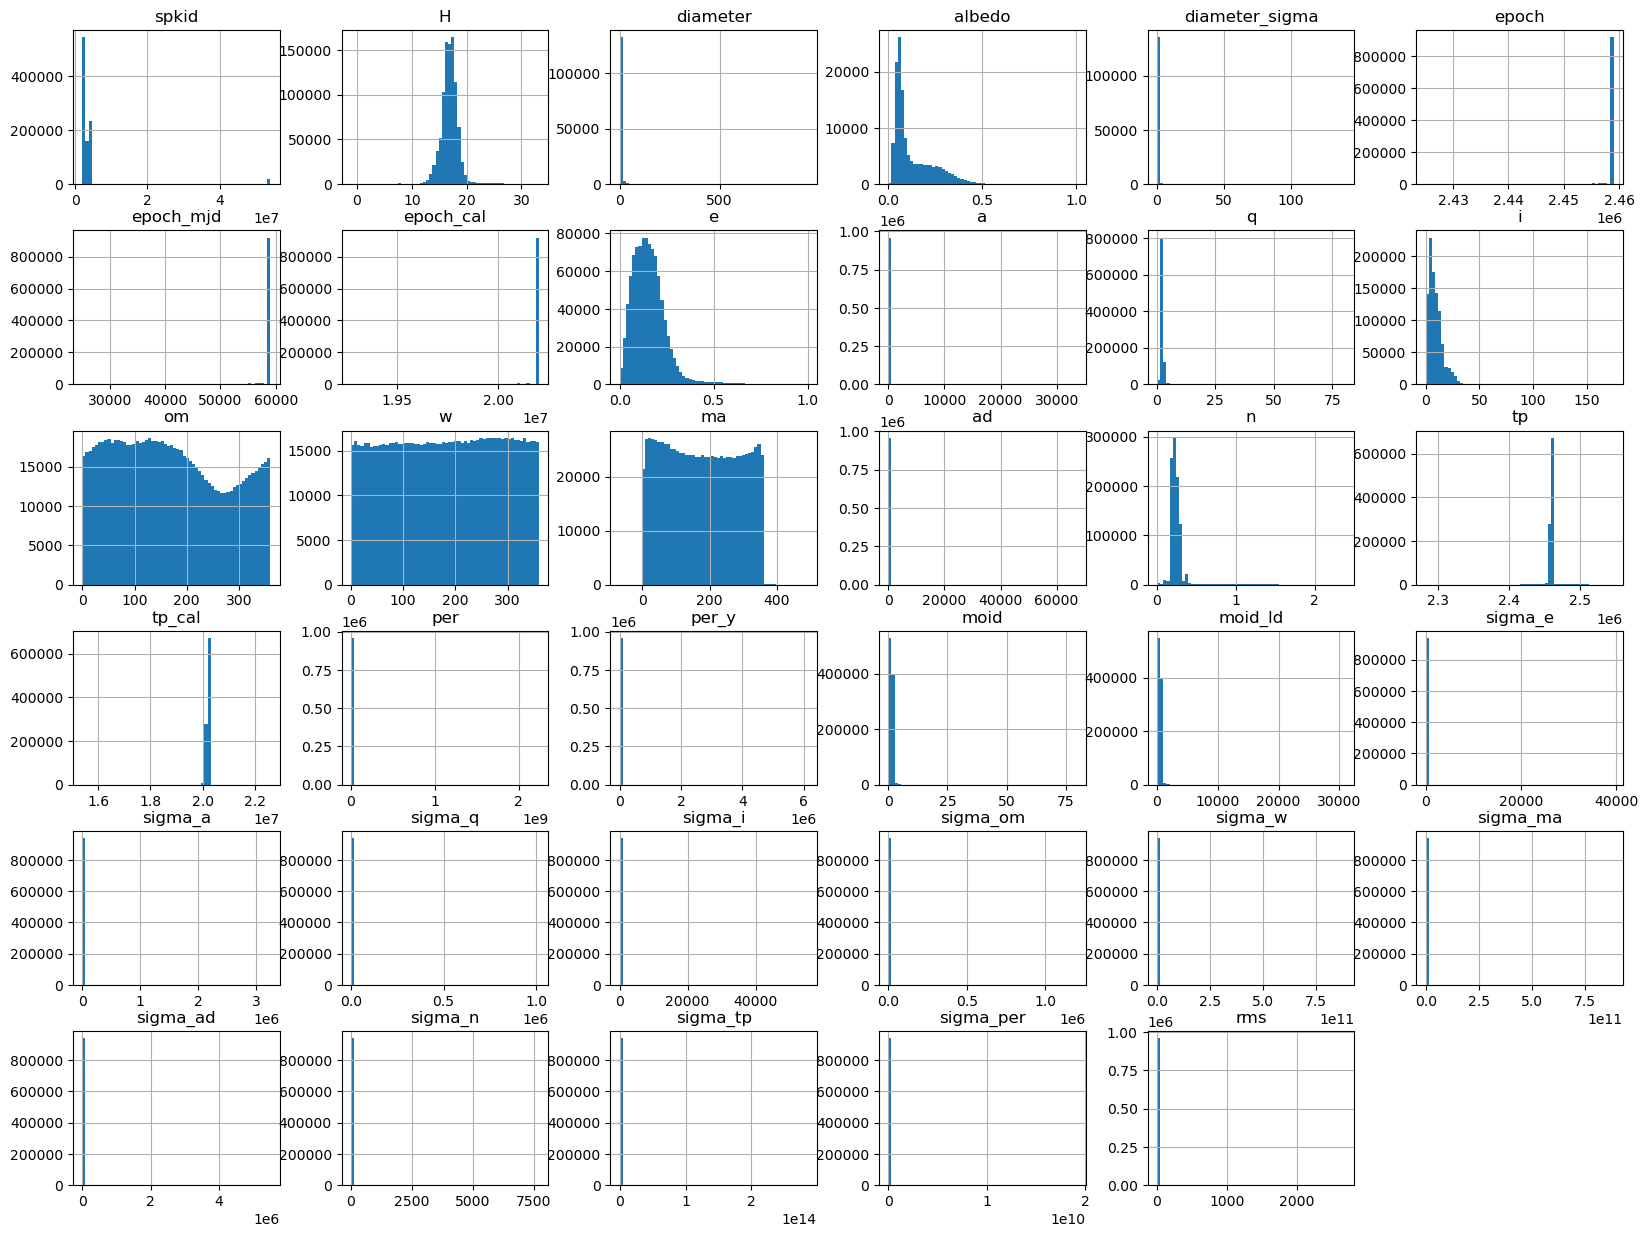

In [109]:
# plotting the dataset using a histogram for each numerical attribute in the dataset
%matplotlib inline
asteroid.hist(bins= 60, figsize=(20,15))
plt.show()

In [110]:
# naming the columns in proper format 
asteroid.columns = [x.upper().strip() for x in asteroid.columns]
asteroid.head()

,ID,SPKID,FULL_NAME,PDES,NAME,PREFIX,NEO,PHA,H,DIAMETER,...,SIGMA_I,SIGMA_OM,SIGMA_W,SIGMA_MA,SIGMA_AD,SIGMA_N,SIGMA_TP,SIGMA_PER,CLASS,RMS
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [111]:
# changing the column name for dependent varible 
asteroid.columns =asteroid.columns.str.replace('NEO', 'PREDICTION')
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958520 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              958520 non-null  object 
 1   SPKID           958520 non-null  int64  
 2   FULL_NAME       958520 non-null  object 
 3   PDES            958520 non-null  object 
 4   NAME            22063 non-null   object 
 5   PREFIX          15 non-null      object 
 6   PREDICTION      958520 non-null  object 
 7   PHA             938599 non-null  object 
 8   H               952257 non-null  float64
 9   DIAMETER        136209 non-null  float64
 10  ALBEDO          135103 non-null  float64
 11  DIAMETER_SIGMA  136081 non-null  float64
 12  ORBIT_ID        958520 non-null  object 
 13  EPOCH           958520 non-null  float64
 14  EPOCH_MJD       958520 non-null  int64  
 15  EPOCH_CAL       958520 non-null  float64
 16  EQUINOX         958520 non-null  object 
 17  E         

<AxesSubplot:title={'center':'NEAR THE EARTH ASTEROID'}, xlabel='PREDICTION', ylabel='count'>

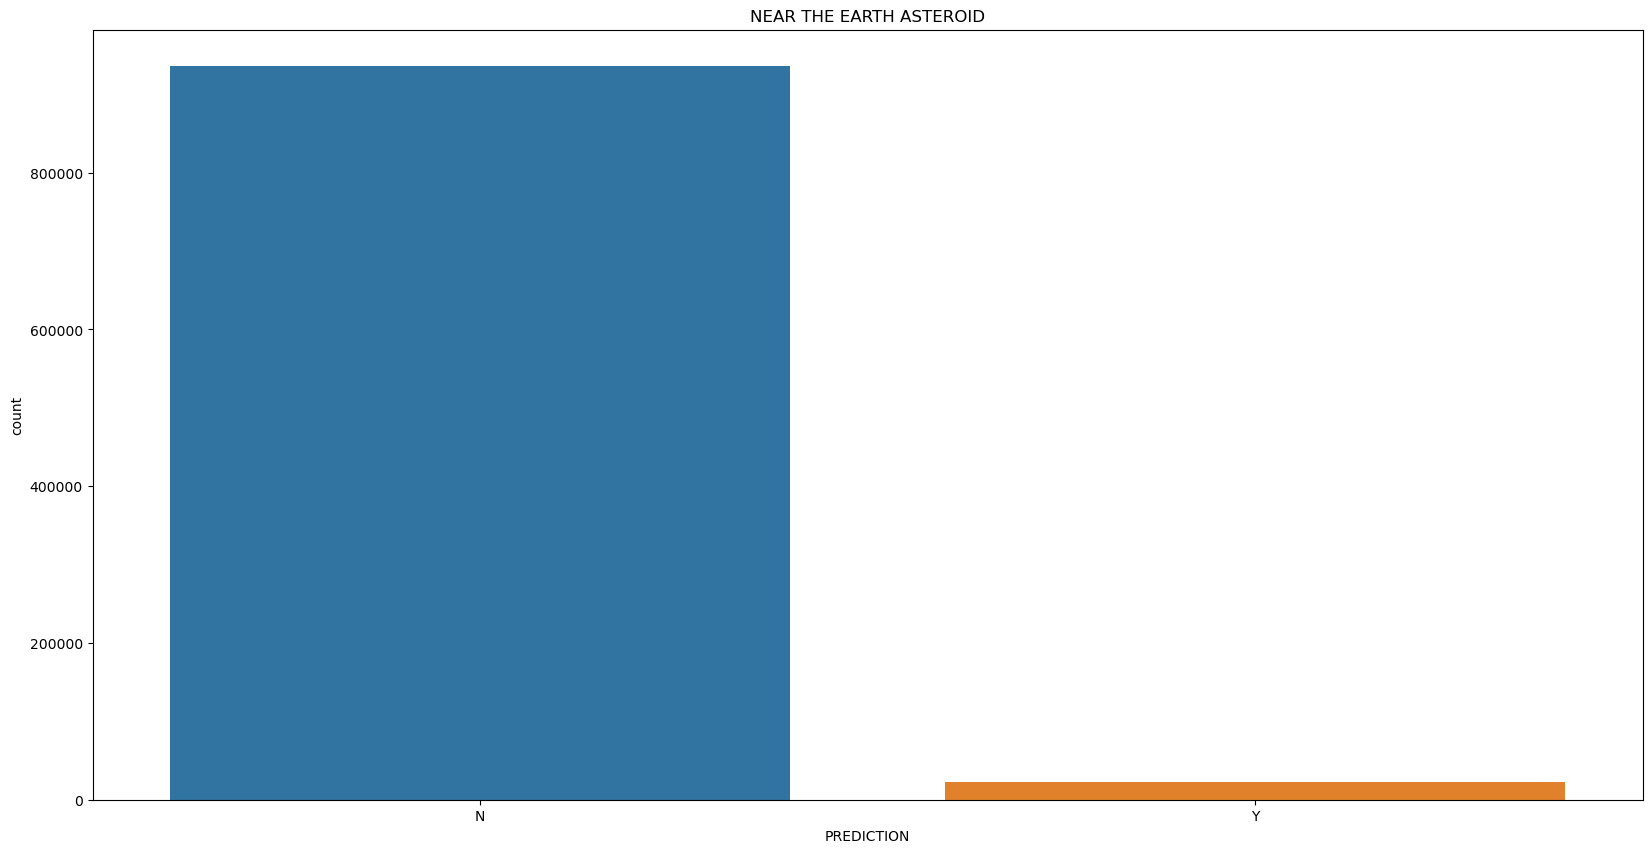

In [112]:
# plotting again to visualize the changed attribute name
plt.figure(figsize=(20,10))
plt.title('NEAR THE EARTH ASTEROID')
sns.countplot(data=asteroid, x='PREDICTION')

In [113]:
print('MAKING A FUNCTION FOR OUR TARGET VAIRABLE PREDICTION\nThis function we change YES into 0 and NO into 1 \nas we dont have any NULL VALUES IN THE column')


MAKING A FUNCTION FOR OUR TARGET VAIRABLE PREDICTION
This function we change YES into 0 and NO into 1 
as we dont have any NULL VALUES IN THE column


In [114]:
# altering the Prediction from object to float by making a function

def alter(column):
    if column == 'Y':
        return 1
    else:
        return 0

In [115]:
# applying the function on the PREDICTION column
asteroid['PREDICTION'] = asteroid['PREDICTION'].apply(alter)

<AxesSubplot:title={'center':'NEAR THE EARTH ASTEROID'}, xlabel='PREDICTION', ylabel='count'>

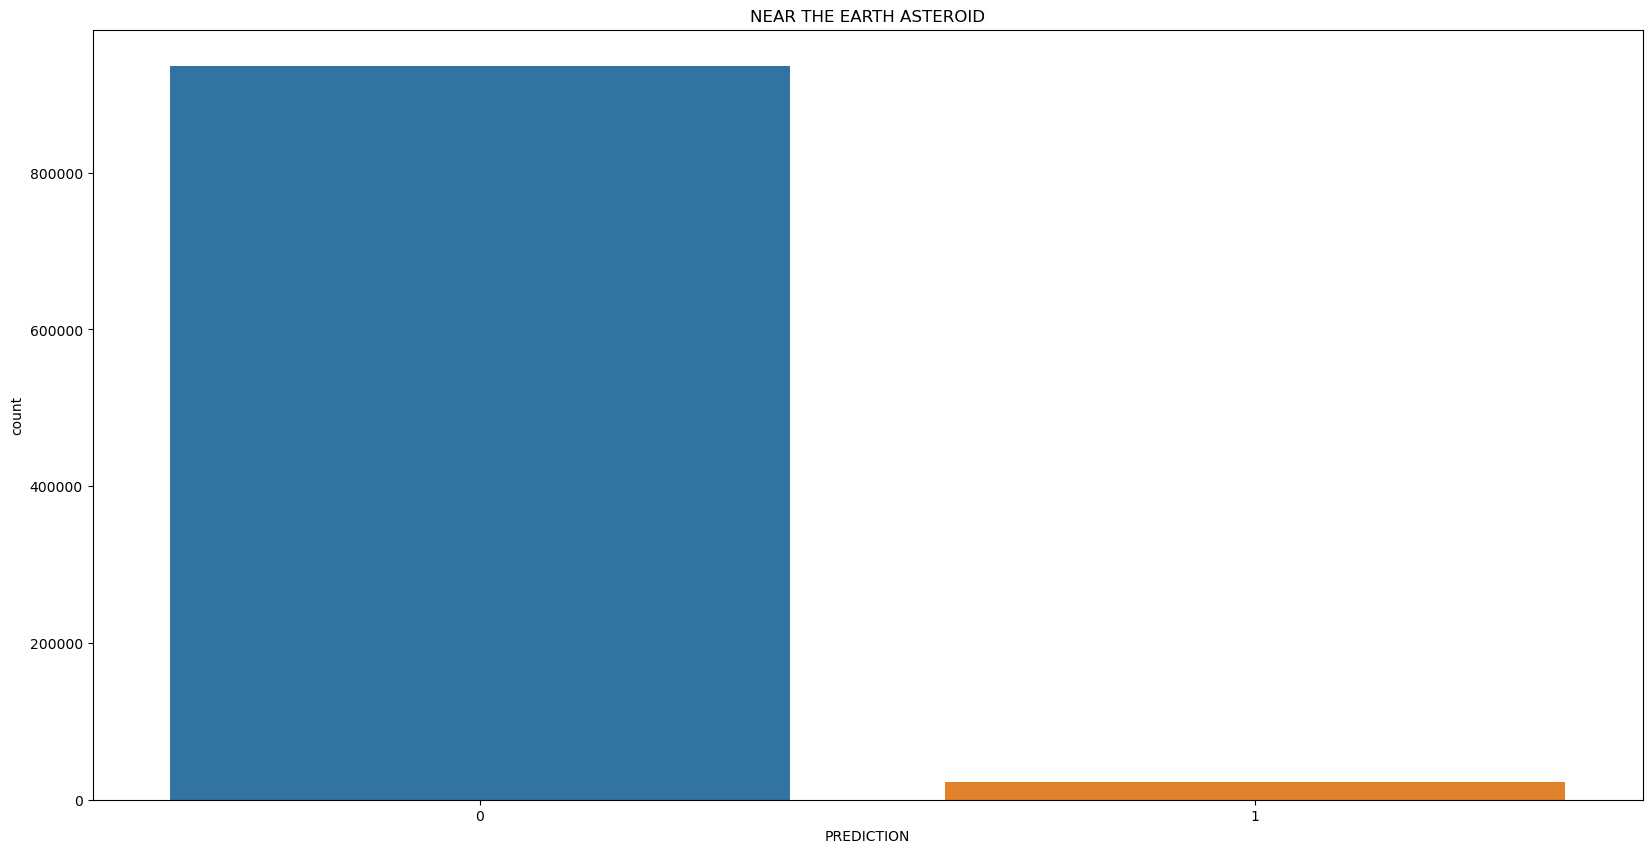

In [116]:
plt.figure(figsize=(20,10))
plt.title('NEAR THE EARTH ASTEROID')
sns.countplot(data=asteroid, x='PREDICTION')

In [117]:
#Notice the change in the datatype of the target variable
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958520 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              958520 non-null  object 
 1   SPKID           958520 non-null  int64  
 2   FULL_NAME       958520 non-null  object 
 3   PDES            958520 non-null  object 
 4   NAME            22063 non-null   object 
 5   PREFIX          15 non-null      object 
 6   PREDICTION      958520 non-null  int64  
 7   PHA             938599 non-null  object 
 8   H               952257 non-null  float64
 9   DIAMETER        136209 non-null  float64
 10  ALBEDO          135103 non-null  float64
 11  DIAMETER_SIGMA  136081 non-null  float64
 12  ORBIT_ID        958520 non-null  object 
 13  EPOCH           958520 non-null  float64
 14  EPOCH_MJD       958520 non-null  int64  
 15  EPOCH_CAL       958520 non-null  float64
 16  EQUINOX         958520 non-null  object 
 17  E         

## DATA PREPARATION


In [118]:
# These columns contains nominal values
print(asteroid['EQUINOX'].nunique(),
asteroid['ORBIT_ID'].nunique(),
asteroid['PDES'].nunique(),
asteroid['ID'].nunique())

1 4690 958520 958520


In [119]:
# dropping the above mentioned features
asteroid = asteroid.drop(columns=['FULL_NAME','NAME','PREFIX','PDES','EQUINOX','ID'],axis=1)

In [120]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958520 entries, 0 to 958523
Data columns (total 39 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SPKID           958520 non-null  int64  
 1   PREDICTION      958520 non-null  int64  
 2   PHA             938599 non-null  object 
 3   H               952257 non-null  float64
 4   DIAMETER        136209 non-null  float64
 5   ALBEDO          135103 non-null  float64
 6   DIAMETER_SIGMA  136081 non-null  float64
 7   ORBIT_ID        958520 non-null  object 
 8   EPOCH           958520 non-null  float64
 9   EPOCH_MJD       958520 non-null  int64  
 10  EPOCH_CAL       958520 non-null  float64
 11  E               958520 non-null  float64
 12  A               958520 non-null  float64
 13  Q               958520 non-null  float64
 14  I               958520 non-null  float64
 15  OM              958520 non-null  float64
 16  W               958520 non-null  float64
 17  MA        

## Frequency Count Method
This technique helps us transform categorical data into numerical by replacing the lables in the data with its frequency count.

In [121]:
# Checking the CLASS column for unique values
asteroid['ORBIT_ID'].nunique()

4690

In [122]:
# we are checking the labels in all of the columns
for column in asteroid.columns[0:]:
    print(f'{column}:{(asteroid[column].nunique())}---> labels') 

SPKID:958520---> labels
PREDICTION:2---> labels
PHA:2---> labels
H:9487---> labels
DIAMETER:16591---> labels
ALBEDO:1057---> labels
DIAMETER_SIGMA:3054---> labels
ORBIT_ID:4690---> labels
EPOCH:5246---> labels
EPOCH_MJD:5246---> labels
EPOCH_CAL:5246---> labels
E:958440---> labels
A:958505---> labels
Q:958505---> labels
I:958410---> labels
OM:958514---> labels
W:958515---> labels
MA:958515---> labels
AD:958505---> labels
N:958510---> labels
TP:958515---> labels
TP_CAL:958495---> labels
PER:958510---> labels
PER_Y:958510---> labels
MOID:314296---> labels
MOID_LD:314297---> labels
SIGMA_E:254738---> labels
SIGMA_A:273294---> labels
SIGMA_Q:248134---> labels
SIGMA_I:215738---> labels
SIGMA_OM:223154---> labels
SIGMA_W:262718---> labels
SIGMA_MA:266815---> labels
SIGMA_AD:269241---> labels
SIGMA_N:251746---> labels
SIGMA_TP:291245---> labels
SIGMA_PER:282687---> labels
CLASS:12---> labels
RMS:64386---> labels


In [123]:
# Coverting the lables of ORBIT_ID into their respective frequency count and then storing it into a dictionary
asteroid_count = asteroid['ORBIT_ID'].value_counts().to_dict()

In [124]:
#Mapping the values of 'astroid_count' dictionary into the ORBIT_ID column
asteroid['ORBIT_ID'] = asteroid['ORBIT_ID'].map(asteroid_count)

In [125]:
#checking the changed values of the ORBIT_ID column
asteroid['ORBIT_ID']

0            45
1           569
2             8
3          1083
4             9
          ...  
958519    19150
958520    18703
958521    12301
958522    29931
958523    29931
Name: ORBIT_ID, Length: 958520, dtype: int64

In [126]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958520 entries, 0 to 958523
Data columns (total 39 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SPKID           958520 non-null  int64  
 1   PREDICTION      958520 non-null  int64  
 2   PHA             938599 non-null  object 
 3   H               952257 non-null  float64
 4   DIAMETER        136209 non-null  float64
 5   ALBEDO          135103 non-null  float64
 6   DIAMETER_SIGMA  136081 non-null  float64
 7   ORBIT_ID        958520 non-null  int64  
 8   EPOCH           958520 non-null  float64
 9   EPOCH_MJD       958520 non-null  int64  
 10  EPOCH_CAL       958520 non-null  float64
 11  E               958520 non-null  float64
 12  A               958520 non-null  float64
 13  Q               958520 non-null  float64
 14  I               958520 non-null  float64
 15  OM              958520 non-null  float64
 16  W               958520 non-null  float64
 17  MA        

Above you can notice that only 2 object attributes are pending to be converted into numerical data

## Working on PHA column 

Checking the PHA column we checked that it contains 19921 NA values. In this situation we could drop the data, but this may result in losing of important information. The other way could be to fill the NA values with most frequently appearing values, however this wont work in our favour as the data is imbalanced.

To solve this issue, we create a new label called 'missing' and replace it with all the NA values in the PHA column.

Note: In the future application we could apply classifier algorithm to predict our missing values like blank values or use unsupervised machine learning methods like clustering to cluster the similarity of the missing values.

In [127]:
#Checking the NA values in the PHA column
asteroid['PHA'].isna().sum()

19921

In [128]:
#Checking the unique values in the PHA column
asteroid['PHA'].unique()

array(['N', 'Y', nan], dtype=object)

## Applying SimpleImputer

In [129]:
# Replacing the misssing values using SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy= 'constant', fill_value= 'missing')
asteroid['PHA']= imputer.fit_transform(asteroid[['PHA']])

In [130]:
#After applying SimpleImputer we have 3 labels
asteroid['PHA'].unique() 

array(['N', 'Y', 'missing'], dtype=object)

## Applying OneHotEncoder

In [131]:
# now applying onehotencoder using sklearn
# sparse matrix length is ambiguous; use getnnz() or shape[0]
ohe  = OneHotEncoder(sparse= False)
asteroid['PHA'] = ohe.fit_transform(asteroid[['PHA']])

In [132]:
# Checking the CLASS column for unique values 
asteroid['CLASS'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO', 'IEO'], dtype=object)

In [133]:
# Applying onehotendcoder on class column
asteroid['CLASS'] = ohe.fit_transform(asteroid[['CLASS']])

In [134]:
#Checking all the data to find if any of the columns are of the object type
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958520 entries, 0 to 958523
Data columns (total 39 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SPKID           958520 non-null  int64  
 1   PREDICTION      958520 non-null  int64  
 2   PHA             958520 non-null  float64
 3   H               952257 non-null  float64
 4   DIAMETER        136209 non-null  float64
 5   ALBEDO          135103 non-null  float64
 6   DIAMETER_SIGMA  136081 non-null  float64
 7   ORBIT_ID        958520 non-null  int64  
 8   EPOCH           958520 non-null  float64
 9   EPOCH_MJD       958520 non-null  int64  
 10  EPOCH_CAL       958520 non-null  float64
 11  E               958520 non-null  float64
 12  A               958520 non-null  float64
 13  Q               958520 non-null  float64
 14  I               958520 non-null  float64
 15  OM              958520 non-null  float64
 16  W               958520 non-null  float64
 17  MA        

In [135]:
# Checking for null values in the numeric attributes of the dataset
asteroid.isnull().sum()

SPKID                  0
PREDICTION             0
PHA                    0
H                   6263
DIAMETER          822311
ALBEDO            823417
DIAMETER_SIGMA    822439
ORBIT_ID               0
EPOCH                  0
EPOCH_MJD              0
EPOCH_CAL              0
E                      0
A                      0
Q                      0
I                      0
OM                     0
W                      0
MA                     1
AD                     0
N                      0
TP                     0
TP_CAL                 0
PER                    0
PER_Y                  0
MOID               19921
MOID_LD              127
SIGMA_E            19922
SIGMA_A            19922
SIGMA_Q            19922
SIGMA_I            19922
SIGMA_OM           19922
SIGMA_W            19922
SIGMA_MA           19922
SIGMA_AD           19922
SIGMA_N            19922
SIGMA_TP           19922
SIGMA_PER          19922
CLASS                  0
RMS                    2
dtype: int64

In [136]:
#We checked that the DIAMETER column has more tha 50% NULL values but just to be sure about the data we are checking the values in the column with our target column.
asteroid.groupby('PREDICTION')['DIAMETER'].count()

PREDICTION
0    135360
1       849
Name: DIAMETER, dtype: int64

In [137]:
# checking the correlation with our dependent varible as this might usefull
corr = asteroid.corr()
corr['PREDICTION'].sort_values(ascending= False)

PREDICTION        1.000000
CLASS             0.603132
N                 0.555678
H                 0.522646
E                 0.486126
I                 0.081696
ALBEDO            0.034652
SPKID             0.026358
OM                0.006241
RMS               0.002176
W                 0.000923
SIGMA_TP         -0.000231
SIGMA_MA         -0.000237
SIGMA_W          -0.000237
PER              -0.000276
PER_Y            -0.000276
SIGMA_AD         -0.000467
SIGMA_PER        -0.000487
SIGMA_A          -0.000554
SIGMA_OM         -0.000602
SIGMA_N          -0.000696
SIGMA_Q          -0.001080
SIGMA_E          -0.001217
SIGMA_I          -0.001248
AD               -0.001754
A                -0.004971
MA               -0.008317
DIAMETER_SIGMA   -0.033147
DIAMETER         -0.036446
TP               -0.050474
TP_CAL           -0.050632
PHA              -0.070367
ORBIT_ID         -0.077095
MOID_LD          -0.094324
MOID             -0.096907
Q                -0.108290
EPOCH            -0.114235
E

In [138]:
# Dropping the columns with more than 90% of NULL values because they are not highly co-related with the target column
asteroid = asteroid.drop(columns= ['DIAMETER','ALBEDO','DIAMETER_SIGMA'])

In [139]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958520 entries, 0 to 958523
Data columns (total 36 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SPKID       958520 non-null  int64  
 1   PREDICTION  958520 non-null  int64  
 2   PHA         958520 non-null  float64
 3   H           952257 non-null  float64
 4   ORBIT_ID    958520 non-null  int64  
 5   EPOCH       958520 non-null  float64
 6   EPOCH_MJD   958520 non-null  int64  
 7   EPOCH_CAL   958520 non-null  float64
 8   E           958520 non-null  float64
 9   A           958520 non-null  float64
 10  Q           958520 non-null  float64
 11  I           958520 non-null  float64
 12  OM          958520 non-null  float64
 13  W           958520 non-null  float64
 14  MA          958519 non-null  float64
 15  AD          958520 non-null  float64
 16  N           958520 non-null  float64
 17  TP          958520 non-null  float64
 18  TP_CAL      958520 non-null  float64
 19  PE

In [140]:
#Checking the remaining null values
asteroid.isnull().sum()

SPKID             0
PREDICTION        0
PHA               0
H              6263
ORBIT_ID          0
EPOCH             0
EPOCH_MJD         0
EPOCH_CAL         0
E                 0
A                 0
Q                 0
I                 0
OM                0
W                 0
MA                1
AD                0
N                 0
TP                0
TP_CAL            0
PER               0
PER_Y             0
MOID          19921
MOID_LD         127
SIGMA_E       19922
SIGMA_A       19922
SIGMA_Q       19922
SIGMA_I       19922
SIGMA_OM      19922
SIGMA_W       19922
SIGMA_MA      19922
SIGMA_AD      19922
SIGMA_N       19922
SIGMA_TP      19922
SIGMA_PER     19922
CLASS             0
RMS               2
dtype: int64

## HANDLING NUMERICAL ATTRIBUTES

In [141]:
# using Simpleimputer we can fill the missing values with median in each numerical column
imputer2  = SimpleImputer(strategy='median')
imputer2.fit(asteroid)

SimpleImputer(strategy='median')

In [142]:
# Checking the values of imputer2 
imputer2.statistics_

array([2.47926050e+06, 0.00000000e+00, 1.00000000e+00, 1.69000000e+01,
       2.17140000e+04, 2.45900050e+06, 5.90000000e+04, 2.02005310e+07,
       1.45001129e-01, 2.64697016e+00, 2.22581455e+00, 7.41564457e+00,
       1.59826919e+02, 1.82357873e+02, 1.75642175e+02, 3.04699474e+00,
       2.28865593e-01, 2.45894459e+06, 2.02004051e+07, 1.57297563e+03,
       4.30657257e+00, 1.24084000e+00, 4.77706175e+02, 8.17160000e-08,
       3.84910000e-08, 2.27190000e-07, 8.68880000e-06, 6.64250000e-05,
       1.04710000e-04, 4.90010000e-05, 4.35900000e-08, 4.63800000e-09,
       2.23080000e-04, 3.50170000e-05, 0.00000000e+00, 5.66280000e-01])

In [143]:
#Comparing the values of imputer2 with the median of the values in the dataset
asteroid.median().values

array([2.47926050e+06, 0.00000000e+00, 1.00000000e+00, 1.69000000e+01,
       2.17140000e+04, 2.45900050e+06, 5.90000000e+04, 2.02005310e+07,
       1.45001129e-01, 2.64697016e+00, 2.22581455e+00, 7.41564457e+00,
       1.59826919e+02, 1.82357873e+02, 1.75642175e+02, 3.04699474e+00,
       2.28865593e-01, 2.45894459e+06, 2.02004051e+07, 1.57297563e+03,
       4.30657257e+00, 1.24084000e+00, 4.77706175e+02, 8.17160000e-08,
       3.84910000e-08, 2.27190000e-07, 8.68880000e-06, 6.64250000e-05,
       1.04710000e-04, 4.90010000e-05, 4.35900000e-08, 4.63800000e-09,
       2.23080000e-04, 3.50170000e-05, 0.00000000e+00, 5.66280000e-01])

In [144]:
#Result would be a plain numpy array containing transformed features 
Z = imputer2.transform(asteroid)

In [145]:
#Adding the transformed values of Z using pandas dataframe
final_asteroid = pd.DataFrame(Z,columns= asteroid.columns,index= asteroid.index)

In [146]:
# Now we notice that the data is clean for further implementation
final_asteroid.isnull().sum()

SPKID         0
PREDICTION    0
PHA           0
H             0
ORBIT_ID      0
EPOCH         0
EPOCH_MJD     0
EPOCH_CAL     0
E             0
A             0
Q             0
I             0
OM            0
W             0
MA            0
AD            0
N             0
TP            0
TP_CAL        0
PER           0
PER_Y         0
MOID          0
MOID_LD       0
SIGMA_E       0
SIGMA_A       0
SIGMA_Q       0
SIGMA_I       0
SIGMA_OM      0
SIGMA_W       0
SIGMA_MA      0
SIGMA_AD      0
SIGMA_N       0
SIGMA_TP      0
SIGMA_PER     0
CLASS         0
RMS           0
dtype: int64

## Defining the Independent and Dependent Varibles

In [147]:
Y = final_asteroid['PREDICTION']
X = final_asteroid.drop('PREDICTION', axis = 1)

In [148]:
# splilting the dataset into train and test sets to avoid overfitting
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size= 0.30,random_state=42 )

In [149]:
# checking the shape of our train and test dataset
print(f'TRAIN----> {X_train.shape},{Y_train.shape} 70% \nTEST----> {X_test.shape},{Y_test.shape} 30% ')

TRAIN----> (670964, 35),(670964,) 70% 
TEST----> (287556, 35),(287556,) 30% 


In [150]:
# looking for correlation in the train dataset
corr_matrix = X_train.corr()
corr_matrix

,SPKID,PHA,H,ORBIT_ID,EPOCH,EPOCH_MJD,EPOCH_CAL,E,A,Q,...,SIGMA_I,SIGMA_OM,SIGMA_W,SIGMA_MA,SIGMA_AD,SIGMA_N,SIGMA_TP,SIGMA_PER,CLASS,RMS
SPKID,1.000000,-0.010303,0.145217,0.267603,0.006852,0.006852,0.007025,0.011242,0.000867,-0.001766,...,-0.000630,-0.000194,-0.000166,-0.000166,-0.000298,-0.000235,-0.000162,-0.000287,0.012027,0.009555
PHA,-0.010303,1.000000,-0.085343,0.262929,0.023009,0.023009,0.021065,-0.056362,0.003587,0.019526,...,0.001375,0.000558,0.000255,0.000255,0.000450,0.001025,0.000250,0.000434,0.005248,0.012644
H,0.145217,-0.085343,1.000000,0.276340,-0.158167,-0.158167,-0.159109,0.346241,-0.103728,-0.436982,...,-0.028973,-0.004168,-0.007822,-0.007821,-0.013632,0.000171,-0.007649,-0.013328,0.272050,0.006946
ORBIT_ID,0.267603,0.262929,0.276340,1.000000,-0.015464,-0.015464,-0.016964,-0.003407,0.006356,0.028043,...,-0.001459,-0.000939,-0.000450,-0.000450,-0.000794,-0.000977,-0.000442,-0.000766,-0.054544,0.005497
EPOCH,0.006852,0.023009,-0.158167,-0.015464,1.000000,1.000000,0.999602,-0.098769,-0.016174,-0.069903,...,-0.070174,-0.022686,-0.015354,-0.015353,-0.029010,-0.037965,-0.015016,-0.028065,-0.053440,0.006379
EPOCH_MJD,0.006852,0.023009,-0.158167,-0.015464,1.000000,1.000000,0.999602,-0.098769,-0.016174,-0.069903,...,-0.070174,-0.022686,-0.015354,-0.015353,-0.029010,-0.037965,-0.015016,-0.028065,-0.053440,0.006379
EPOCH_CAL,0.007025,0.021065,-0.159109,-0.016964,0.999602,0.999602,1.000000,-0.100060,-0.015969,-0.069626,...,-0.069754,-0.022745,-0.015391,-0.015390,-0.028744,-0.037438,-0.015054,-0.027790,-0.054096,0.006361
E,0.011242,-0.056362,0.346241,-0.003407,-0.098769,-0.098769,-0.100060,1.000000,0.037593,-0.122504,...,0.000449,-0.000004,-0.002819,-0.002819,0.009504,0.001382,-0.002761,0.009467,0.253333,-0.003744
A,0.000867,0.003587,-0.103728,0.006356,-0.016174,-0.016174,-0.015969,0.037593,1.000000,0.243151,...,0.020333,0.003292,0.005930,0.005930,0.019785,0.000584,0.005816,0.031925,-0.006414,-0.001436
Q,-0.001766,0.019526,-0.436982,0.028043,-0.069903,-0.069903,-0.069626,-0.122504,0.243151,1.000000,...,0.093598,0.016947,0.033738,0.033736,0.043577,0.002239,0.033086,0.042695,-0.055603,-0.004856


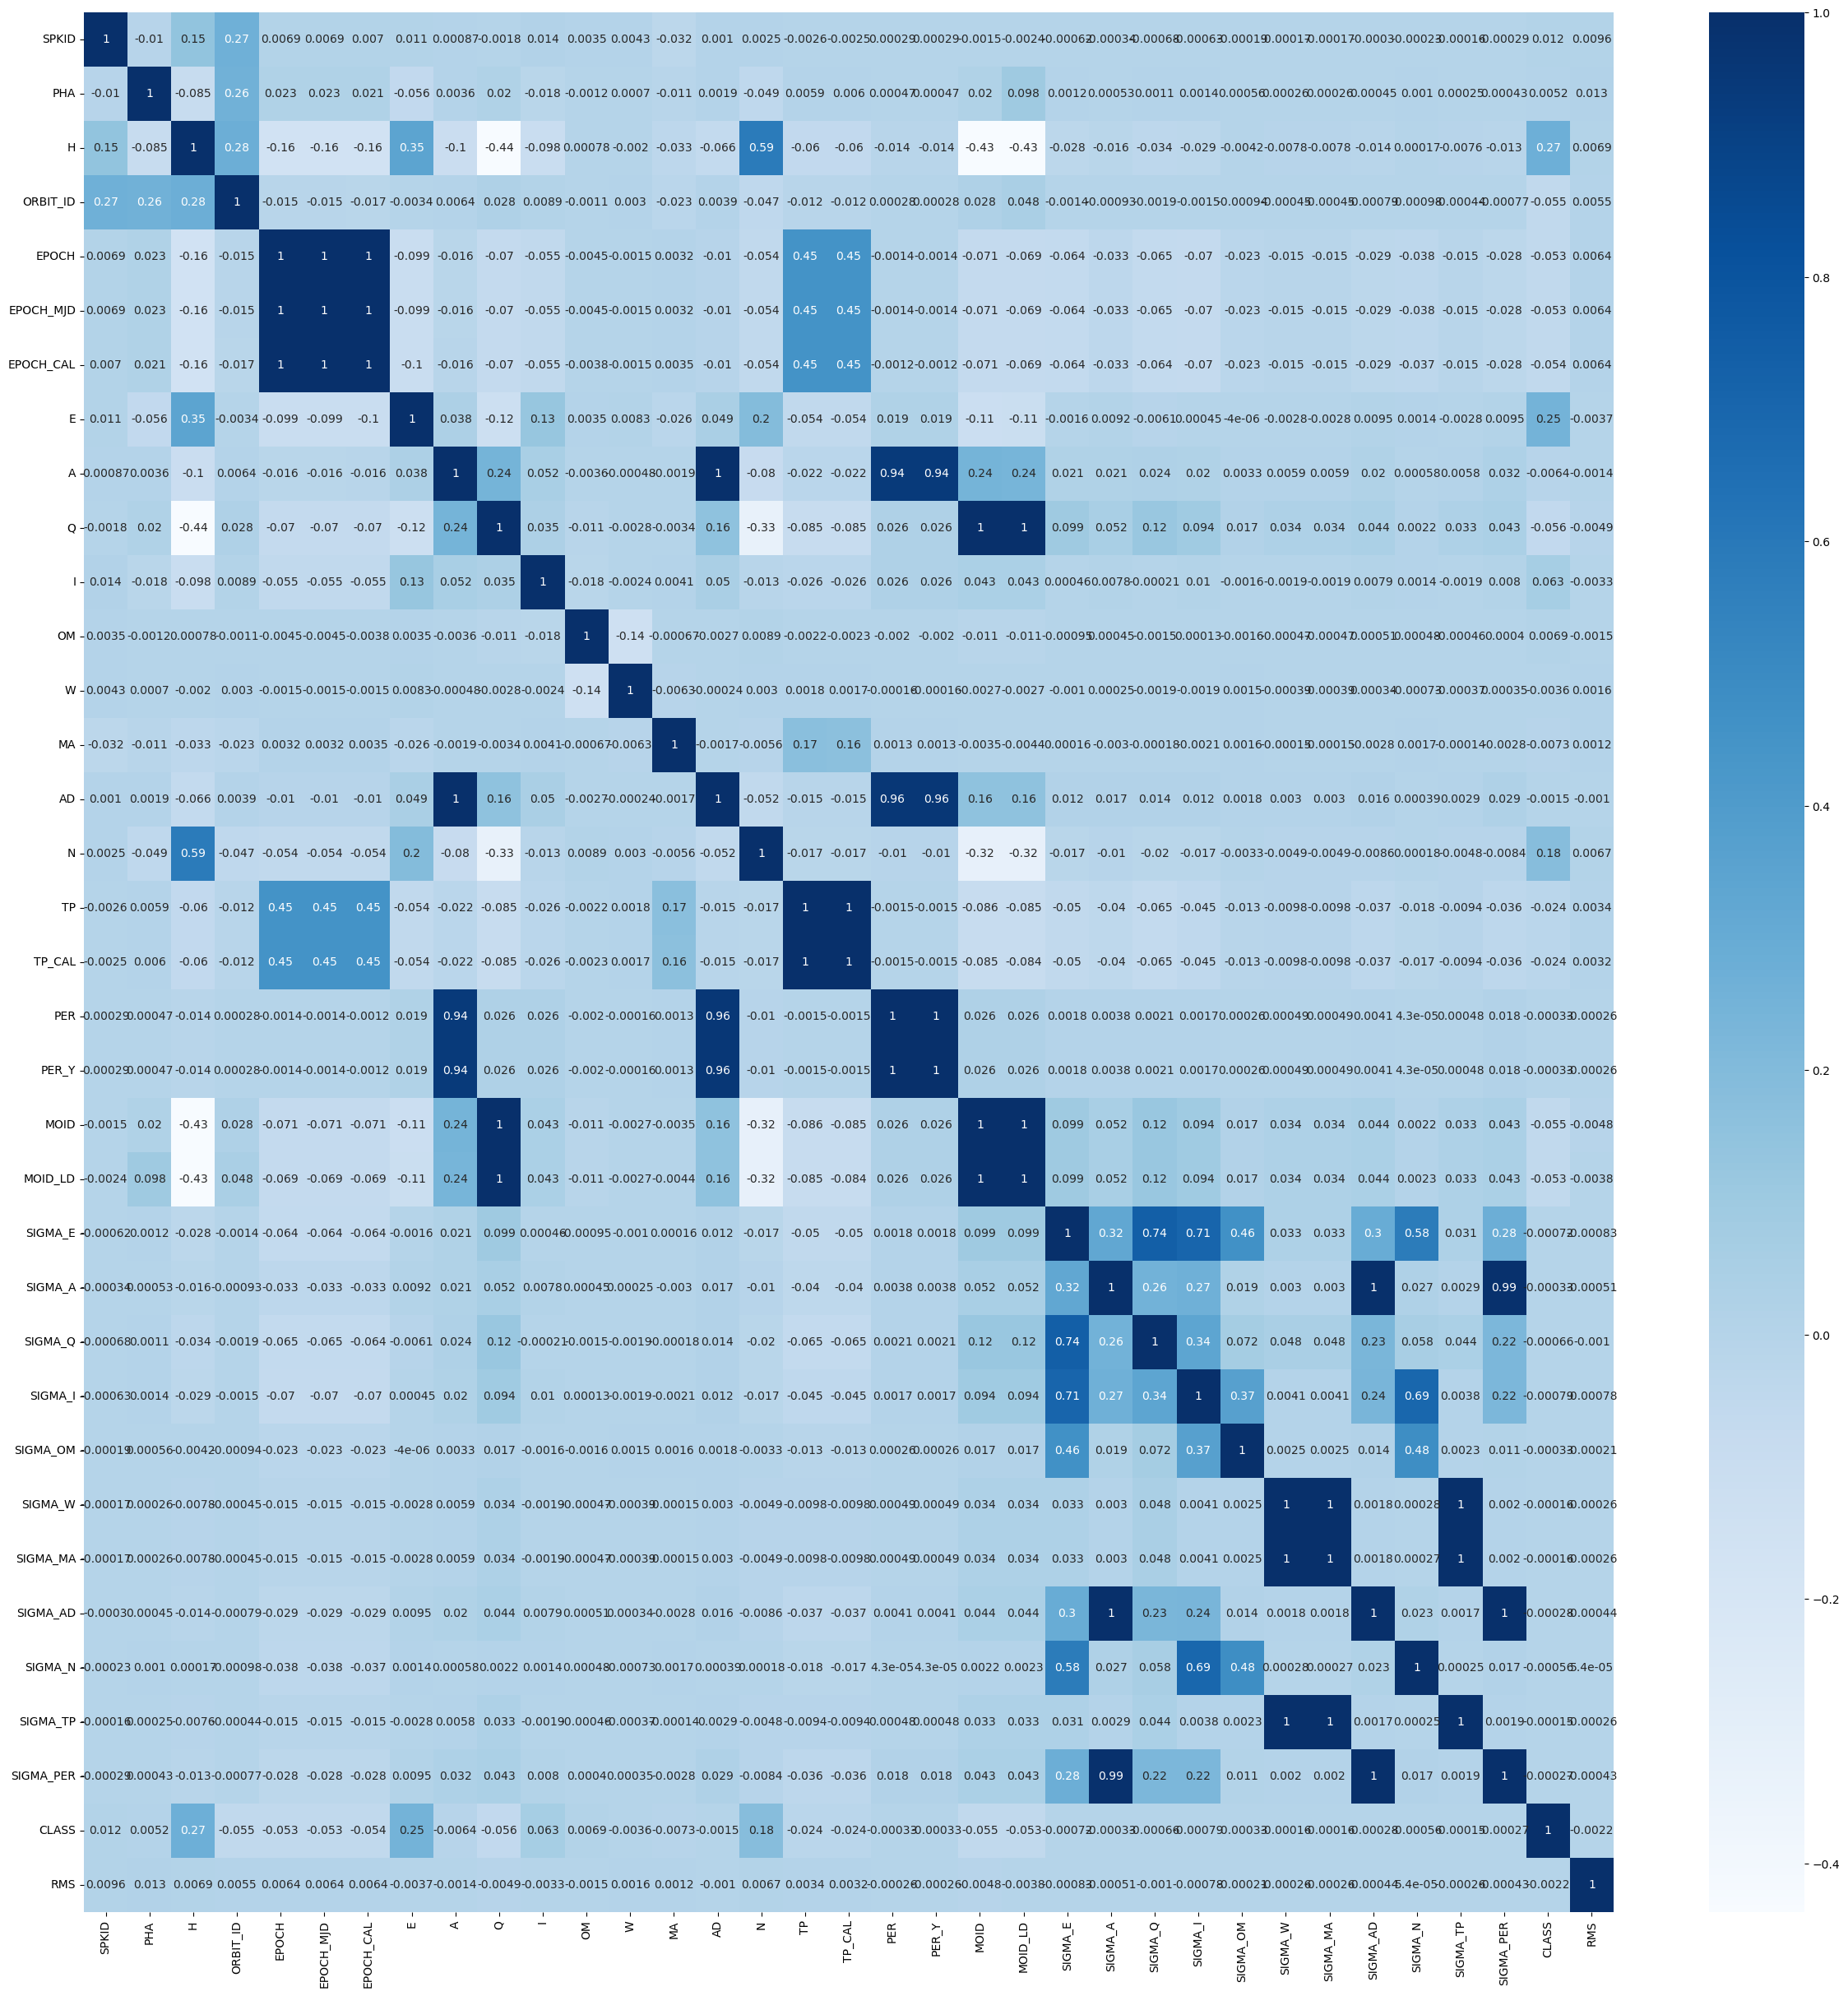

In [151]:
# Performing pearson correlation using Heatmap
import seaborn as sns
plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor,annot =True,cmap = plt.cm.Blues)
plt.show()

In [152]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
# abs method converts -ve correlation into +ve one
# Note: we should avoid removing -ve correlated as it would be helpful in traning models for better prediction

def correlation(dataset, threshold):
    col_corr = set() # set of all the names of correlared columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # if (corr_matrix.iloc[i,j])> threshold: # we are interesred in +ve coeff value
            if  abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
            

In [153]:
#Assigning 0.8 threshold value to get highly positive and negative correlation
corr_features = correlation(X_train,0.8)
len(set(corr_features)) #Displaying the number of highly correlated columns

12

In [154]:
# these columns are highly correlated with other columns
corr_features

{'AD',
 'EPOCH_CAL',
 'EPOCH_MJD',
 'MOID',
 'MOID_LD',
 'PER',
 'PER_Y',
 'SIGMA_AD',
 'SIGMA_MA',
 'SIGMA_PER',
 'SIGMA_TP',
 'TP_CAL'}

In [155]:
# droping these columns 
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1) # Dropping these highly correlated columns from the test dataset as well

In [156]:
#Notice the remaining number of columns in the train and test dataset
X_train.shape, X_test.shape

((670964, 23), (287556, 23))

# Normalization

We will be scaling the data using MinMaxScaler. This method from sklearn which will scale from range 0 to 1. Also we can change the range by using feature_range hyperparamter

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [158]:
# Fiting the data into X_train and X_test
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns.tolist())
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns.tolist())

## Model Development and Evaluation

In [159]:
log = LogisticRegression()

In [160]:
#fit the model on the training data
log.fit(X_train, Y_train)

/Users/raw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [161]:
#Using trained model to predict for test set
y_pred = log.predict(X_test)

In [162]:
#Accuracy
log.score(X_test, Y_test) * 100

99.9777434656206

In [163]:
#Comparing the score of the trained data with test data
log.score(X_train,Y_train)*100

99.98211528487371

In [164]:
#confusion matrix to determine accuracy for each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[280601,     25],
       [    39,   6891]])

In [165]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

In [166]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

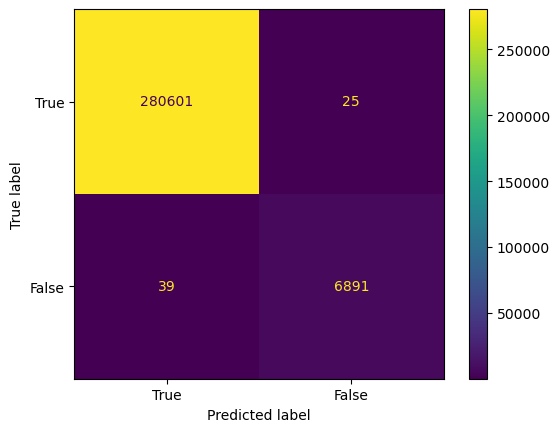

In [167]:
cm_display.plot()
plt.show()

In [168]:
from sklearn.metrics import classification_report

In [169]:
print(classification_report(Y_test , y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    280626
         1.0       1.00      0.99      1.00      6930

    accuracy                           1.00    287556
   macro avg       1.00      1.00      1.00    287556
weighted avg       1.00      1.00      1.00    287556



## OPTIMIZATION USING OVERSAMPLING METHOD FOR IMBALANCE DATA



In [170]:
from sklearn.linear_model import SGDClassifier

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix




## HYPERPARAMETER TUNING

In [171]:
 # hyperparameter tuning

model = Pipeline([('standization',StandardScaler()),
                  ('balancing', SMOTE(random_state = 101)),
                  ('classification', SGDClassifier(loss = 'log', penalty = 'elasticnet', random_state = 1,verbose=True,learning_rate='optimal'))])

grid_param = {'classification__eta0': [0.001, 1], 
              'classification__alpha': [0.001, 1],
              'classification__l1_ratio': [0, 1,]}

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='recall', cv=5)

In [172]:
X_train.shape,Y_train.shape

((670964, 23), (670964,))

In [173]:
%%time
gd_sr.fit(X_train,Y_train)



-- Epoch 1
Norm: 9.45, NNZs: 23, Bias: -40.505318, T: 1047998, Avg. loss: 0.004780
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 9.12, NNZs: 23, Bias: -39.111385, T: 2095996, Avg. loss: 0.003485
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 8.95, NNZs: 23, Bias: -38.312516, T: 3143994, Avg. loss: 0.003354
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 8.84, NNZs: 23, Bias: -37.754627, T: 4191992, Avg. loss: 0.003278
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 8.75, NNZs: 23, Bias: -37.327300, T: 5239990, Avg. loss: 0.003218
Total training time: 1.28 seconds.
-- Epoch 6
Norm: 8.68, NNZs: 23, Bias: -36.982108, T: 6287988, Avg. loss: 0.003165
Total training time: 1.53 seconds.
-- Epoch 7
Norm: 8.62, NNZs: 23, Bias: -36.693044, T: 7335986, Avg. loss: 0.003116
Total training time: 1.79 seconds.
Convergence after 7 epochs took 1.79 seconds
-- Epoch 1
Norm: 9.17, NNZs: 23, Bias: -38.928224, T: 1047998, Avg. loss: 0.004759
Total training time: 0.26 seconds.
-- Epoch 2


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standization', StandardScaler()),
                                       ('balancing', SMOTE(random_state=101)),
                                       ('classification',
                                        SGDClassifier(loss='log',
                                                      penalty='elasticnet',
                                                      random_state=1,
                                                      verbose=True))]),
             param_grid={'classification__alpha': [0.001, 1],
                         'classification__eta0': [0.001, 1],
                         'classification__l1_ratio': [0, 1]},
             scoring='recall')

In [174]:
# SCORE
gd_sr.best_score_*100

100.0

In [175]:
gd_sr.best_params_


{'classification__alpha': 1,
 'classification__eta0': 0.001,
 'classification__l1_ratio': 1}

In [176]:
y_gd_Sr = gd_sr.predict(X_test)

In [177]:
"""In the above GridSearchCV(), scoring parameter should be set as follows:
scoring = 'accuracy' when you want to maximize prediction accuracy
scoring = 'recall' when you want to minimize false negatives
scoring = 'precision' when you want to minimize false positives
scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)"""

"In the above GridSearchCV(), scoring parameter should be set as follows:\nscoring = 'accuracy' when you want to maximize prediction accuracy\nscoring = 'recall' when you want to minimize false negatives\nscoring = 'precision' when you want to minimize false positives\nscoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)"

## OPTIMIZATION USING UNDERSAMPLING METHOD FOR IMBALANCE DATA


In [179]:
# Original shape of the target column
NO = final_asteroid[final_asteroid['PREDICTION'] == 0].shape
YES = final_asteroid[final_asteroid['PREDICTION']== 1].shape
print(f'{NO},{YES}')

(935625, 36),(22895, 36)


As we can see that the data is imbalance hence we use the undersampling method to avoid bias decision of the model. This method would help us balance the class distribution with data sampling.

In [180]:
from imblearn.under_sampling import NearMiss

In [181]:
# implementing undersampling for imbalance data
nm = NearMiss()
#Fitting X and Y in the model
X_near, Y_near = nm.fit_resample(X,Y)
X_near.shape, Y_near.shape


((45790, 35), (45790,))

In [182]:
# Reapplying train and test split on the balanced data

X_train,X_test, Y_train, Y_test = train_test_split(X_near,Y_near, test_size=0.20, random_state=42)


In [183]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)



## HYPERPARAMETER TUNNING

In [184]:
model1 = Pipeline([('scaling',StandardScaler()),('model',LogisticRegression(max_iter=1000))])


param_grid = {'model__penalty':["l1","l2"], 
            'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'model__max_iter':[100,1000,2500]     
                  }
        

clf = GridSearchCV(estimator=model1,param_grid=param_grid,cv=3)


In [185]:
clf.fit(X_train,Y_train)

/Users/raw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raw/opt/anaconda3/lib/python3.9/site-packages/sklearn

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'model__max_iter': [100, 1000, 2500],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sag', 'saga']})

In [186]:
# SCORE
clf.best_score_*100


99.99727022083914

In [187]:
clf.best_params_

{'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'liblinear'}

In [188]:
y_clf = clf.predict(X_test)


y_clf

array([0., 1., 1., ..., 1., 0., 1.])

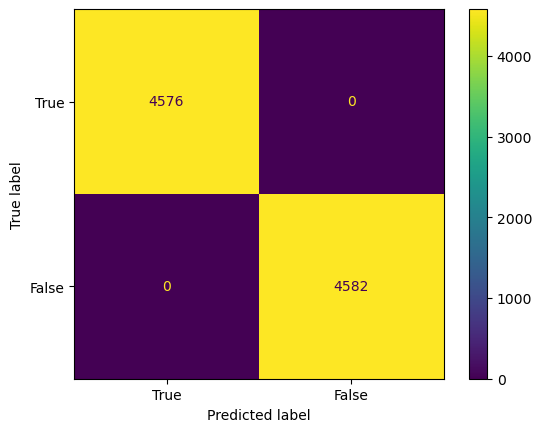

In [189]:
confusion_matrix3 = metrics.confusion_matrix(Y_test,y_clf)

cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix3,display_labels=[True,False])
cm_display3.plot()
plt.show()



In [197]:
from pandas.core.base import value_counts
value_counts(y_clf)

1.0    4582
0.0    4576
dtype: int64

## ACCURACY COMPARISON 

In [190]:
# TWO OPTIMIZATION METHODS 
accuracy_df = pd.DataFrame({ 'clf':clf.best_score_,'gd_sr':gd_sr.best_score_*100 },index=[0])
accuracy_df


,clf,gd_sr
0,0.999973,100.0


## checking weights

In [191]:
# higher the weight it is more important for prediction
# lower the weight less important for predcition

In [192]:
print(log.coef_.tolist())
print(X_train.columns.tolist())

[[0.12062498623931889, -0.9373352285659919, 21.355385330380816, -3.330034937608209, 0.7429640476627495, 18.77473010673518, -0.6516830815323208, -3.639767443620773, -0.5323440476425072, -0.04489642592557169, 0.049764752732597374, 0.2379919338616048, 35.2176765016213, 0.40119076947295845, -0.0022346828186964682, -0.00014197149046024462, 7.094970186207389e-05, -4.192132525778258e-05, -0.00381715251647816, 6.879273312367756e-06, -0.0062159349824193215, 7.693376902879844, 0.005573086652306784]]
['SPKID', 'PHA', 'H', 'ORBIT_ID', 'EPOCH', 'E', 'A', 'Q', 'I', 'OM', 'W', 'MA', 'N', 'TP', 'SIGMA_E', 'SIGMA_A', 'SIGMA_Q', 'SIGMA_I', 'SIGMA_OM', 'SIGMA_W', 'SIGMA_N', 'CLASS', 'RMS']


In [193]:
# using zero becoz weights are 2d dim
weight_df = pd.DataFrame({
    'feature': X_train.columns,
    'Weights': log.coef_.tolist()[0]
    
    
    })
weight_df

,feature,Weights
0,SPKID,0.120625
1,PHA,-0.937335
2,H,21.355385
3,ORBIT_ID,-3.330035
4,EPOCH,0.742964
5,E,18.774730
6,A,-0.651683
7,Q,-3.639767
8,I,-0.532344
9,OM,-0.044896


<AxesSubplot:xlabel='Weights', ylabel='feature'>

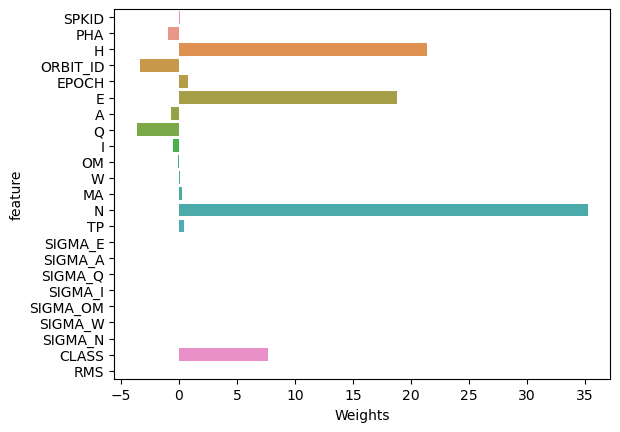

In [194]:
# visualize the things

sns.barplot(data= weight_df, x='Weights', y = 'feature')
